# <center>Бинарная классификация и отправка на Kaggle

В этой практической работе вам предстоит решать задачу бинарной классификации

В этом файле вам будет предложено baseline решение, как отправлять ответ на проверку, идеи по улучшению решения, шаги для загрузки своего ответа (submission)  на платформе kaggle

         
1. Для начала, необходимо зарегистрироваться на сайте https://www.kaggle.com/ 
2. После этого, переходите на свое соревнование согласно варианту:
    
    a) https://www.kaggle.com/c/mad-titanic
    
    b) https://www.kaggle.com/c/mad-churn
    
    c) https://www.kaggle.com/c/mad-insurance

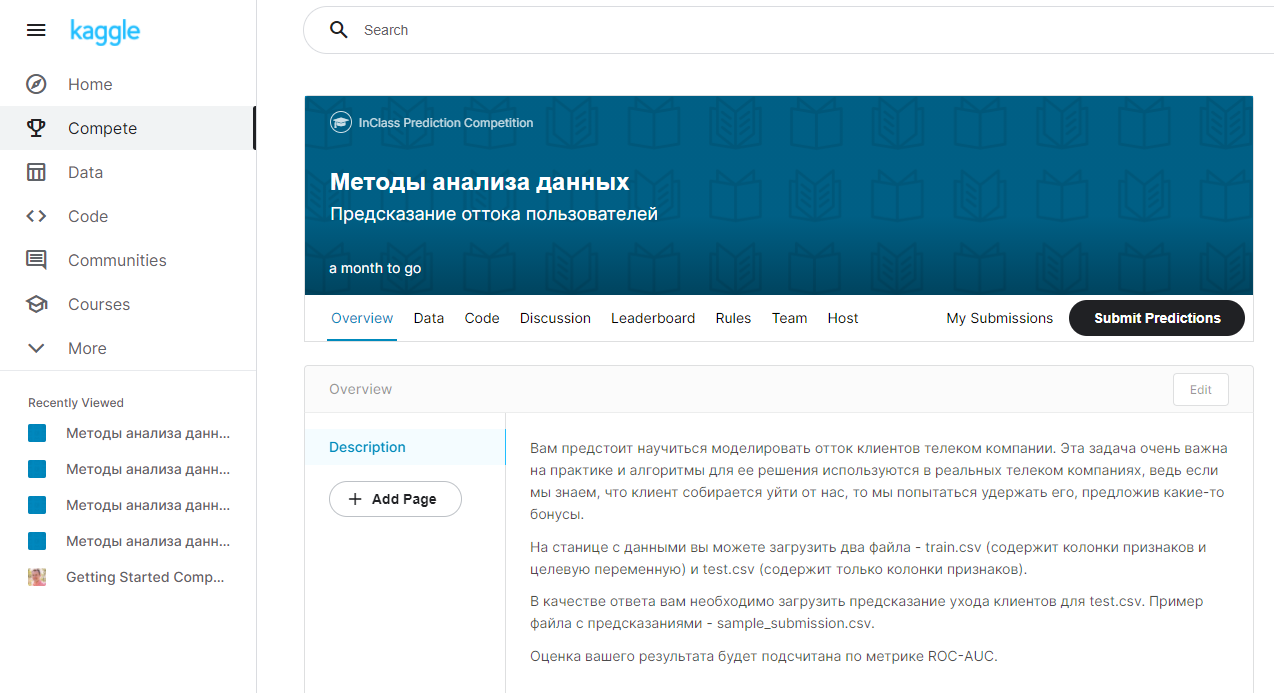

### 3. Знакомимся с описанием задачи и данных.

### 4. Переходим во вкладку Team и в поле Team name указавыем информацию о вас согласно шаблону Фамилия\_Имя\_Группа

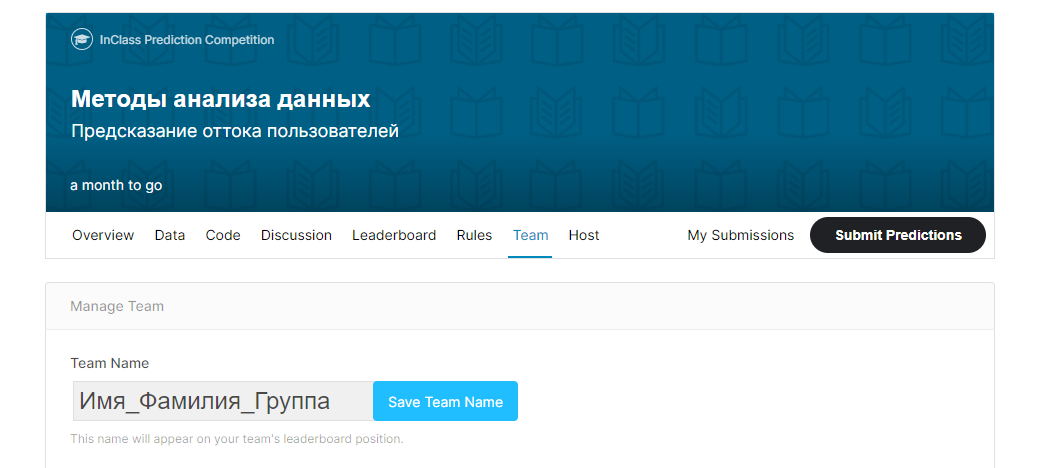

### 5. Во вкладке Data будут данные, на которых будем обучать модель и проверять нашу модель на test выборке. В файле sample_submission пример отправленного решения

### Приступим к решению. Рассмотрим на примере варианта из пункта b

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [69]:
train = pd.read_csv("data_baseline//train.csv")
test = pd.read_csv("data_baseline///test.csv")

### Посмотрим на данные

In [70]:
train.head()

,id,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,...,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,4719,28,20.30,487.95,Male,0,Yes,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),0
1,3190,12,81.45,912,Male,0,No,No,Yes,No,...,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,0
2,5215,25,20.15,536.35,Male,0,No,No,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,0
3,1472,50,69.50,3418.2,Male,0,No,No,Yes,Yes,...,No,No,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),0
4,4413,39,101.25,3949.15,Female,1,Yes,No,Yes,Yes,...,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0


In [71]:
test.head()

,id,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,2258,46,55.65,2688.85,Female,0,No,No,Yes,No,DSL,No,No,No,No,No,Yes,One year,No,Credit card (automatic)
1,3864,48,78.75,3682.45,Male,0,No,Yes,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
2,1391,7,69.20,477.55,Female,0,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
3,486,3,75.15,216.75,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)
4,970,14,19.35,324.8,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check


### Датасеты train и test отличаются толькой одной колонкой - той, что надо предсказать.

### Посмотрим на количество пропусков в каждой колонке

In [72]:
train.isna().sum()

id                          0
ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [73]:
test.isna().sum()

id                          0
ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

### Вообще, isna находит не все пропуски. 
### Например, если внезапно численная переменная вдруг становится строкой - это звоночек, что там есть какие-то проблемы.
### Поэтому рекомендуется у строк, которые не являются численными (int64, float64), выводить уникальные значения. 
### Там и можно обнаружить пропуски

### Посмотрим на тип данных каждой из колонок

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        3169 non-null   int64  
 1   ClientPeriod              3169 non-null   int64  
 2   MonthlySpending           3169 non-null   float64
 3   TotalSpent                3169 non-null   object 
 4   Sex                       3169 non-null   object 
 5   IsSeniorCitizen           3169 non-null   int64  
 6   HasPartner                3169 non-null   object 
 7   HasChild                  3169 non-null   object 
 8   HasPhoneService           3169 non-null   object 
 9   HasMultiplePhoneNumbers   3169 non-null   object 
 10  HasInternetService        3169 non-null   object 
 11  HasOnlineSecurityService  3169 non-null   object 
 12  HasOnlineBackup           3169 non-null   object 
 13  HasDeviceProtection       3169 non-null   object 
 14  HasTechS

In [75]:
train.describe()

,id,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000
mean,2658.504891,31.855790,65.157715,0.162512,0.265068
std,1536.114959,24.471827,29.921808,0.368978,0.441439
min,1.000000,0.000000,18.250000,0.000000,0.000000
25%,1330.000000,8.000000,39.200000,0.000000,0.000000
50%,2635.000000,28.000000,70.700000,0.000000,0.000000
75%,4027.000000,54.000000,89.850000,0.000000,1.000000
max,5279.000000,72.000000,118.650000,1.000000,1.000000


In [76]:
# здесь есть ловукша, поищите
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'IsSeniorCitizen'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'HasPartner',
    'TotalSpent',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols
target_col = 'Churn'

### В sklearn большинство моделей не обрабатывают категориальные признаки.
### А у нас они есть... поэтому вспоминаем первую практическую и обрабатываем категориальные признаки.
### Также, мы применяли one-hot encoding к категориальным признакам, потому что с label-encoding в случае 3 и более значений образовывались операции +- над категориями. 
### Но вспомним, что после one-hot encoding мы получали бинарные данные, а некоторые из признаков и так уже бинарные.

### А еще можно обрабатывать числовые признаки. Можно же?

In [77]:
# *имитируем процесс обработки данных*

In [78]:
x = train[num_cols]
y = train[target_col]

Посмотрим на распеределение значения целевой переменной

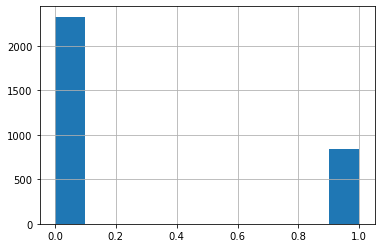

In [79]:
y.hist()
plt.show()

### Можем заметить, что Y несбалансирован
### Поэтому предсказательную способность модели будем оценивать по метрике ROC-AUC.
### Так же воспользуемся воспользуем разделением данных на тренировочную и валидационную выборку

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.7)

In [82]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

### Посмотрим на получившийся результат и построим график для ROC-AUC. Обратите внимаение, что мы предсказываем колонку 'Churn' с помощью метода predict_proba(), а почему не обычный predict() ответите на защите

In [83]:
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

In [84]:
y_train_predicted_knn = knn.predict_proba(x_train)[:, 1]
y_val_predicted_knn = knn.predict_proba(x_val)[:, 1]

In [85]:
def roc_auc_plot(y_train, y_train_predicted, y_val, y_val_predicted):
    train_auc = roc_auc_score(y_train, y_train_predicted)
    test_auc = roc_auc_score(y_val, y_val_predicted)

    plt.figure(figsize=(10,7))
    plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
    plt.plot(*roc_curve(y_val, y_val_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show()

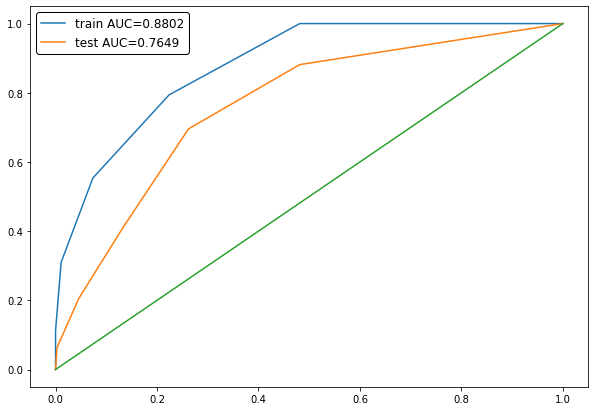

In [86]:
roc_auc_plot(y_train, y_train_predicted_knn, y_val, y_val_predicted_knn)

In [87]:
# Модель обучили теперь можно и предсказать колонку 'Churn' для test

In [88]:
# сохраним колонку с id, для файла с ответом
test_id = test['id']
test = test[num_cols]
y_test_predicted_knn = knn.predict_proba(test)[:, 1]

In [89]:
def create_submission(id_col, y_pred):
    submission = pd.DataFrame({
        'id': id_col,
        'Churn': y_pred
    })
    return submission

In [90]:
sub = create_submission(test_id, y_test_predicted_knn)

In [91]:
sub

,id,Churn
0,2258,0.0
1,3864,0.0
2,1391,0.2
3,486,0.4
4,970,0.2
...,...,...
2108,1700,0.2
2109,1865,0.0
2110,478,0.0
2111,1227,0.6


In [92]:
# сохраним файл с ответом и загрузим его для на kaggle
sub.to_csv("data_baseline//sub.csv", index=False)

### Перейдем на наше соревнование и загрузим ответ
### Для этого нажимаем на Submit Predictions
### Загружаем файл с ответом
### Нажимаем make Submsission
### Показывается наш результат
### Переходим во вкладку Leaderboard, что бы посмотреть на место, которые мы заняли

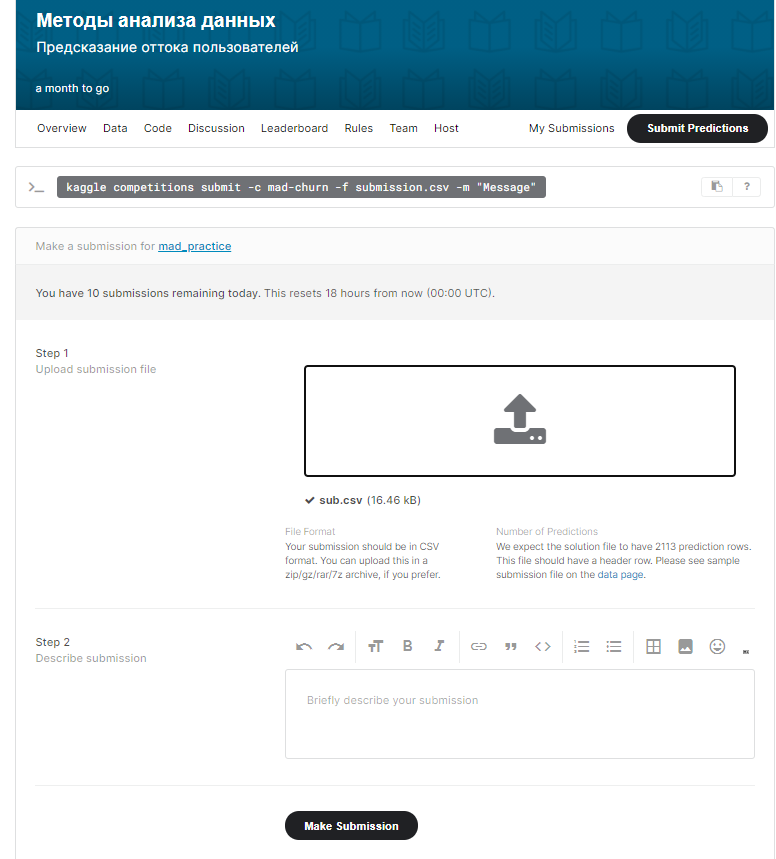

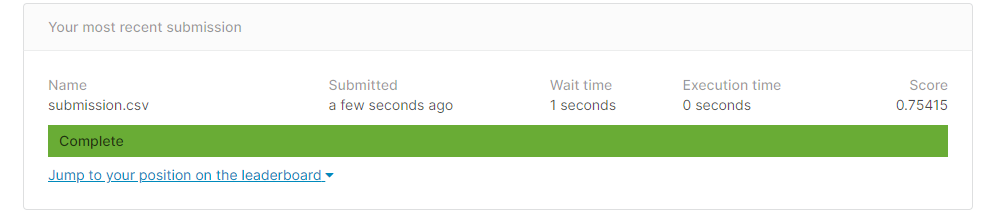

### Советы для улучшения результата
1. Построить графики для данных и поискать закономерности 
2. Нормальная предобработка признаков, отбор признаков, создание новых признаков
3. Попробовать другие модели
4. Перебор параметров для моделей
5. Погуглить про задачу и посмотреть, как люди подходят к решению задачи классификации